### Numerical / Continuous  Variables

In [26]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [27]:
filterDf  = load_df('filterDf')
descDf = load_df('descDf')
types = get_var_types()

#### Variable List

In [28]:
variable_types(descDf, 'Numeric Continuous')

,category,variable
0,Assignment (a),assignment_max_attempts
1,Assignment (a),number_of_distinct_instance_items
2,Assignment (a),number_of_learners
3,Assignment Attempt (aa),assignment_attempt_number
4,Assignment Attempt (aa),final_score_unweighted
5,Assignment Attempt (aa),points_possible_unweighted
6,Item Attempt (ia),raw_score


#### Statistics

In [13]:
def num_cont_vars():
  # Numerical / Continuous Variables
  desc = filterDf.describe()
  for f in types['continuousVars']:
    desc.select("summary", f).show(5,False)

num_cont_vars()

+-------+-------------------------+
|summary|assignment_attempt_number|
+-------+-------------------------+
|count  |80548                    |
|mean   |0.9805581764910364       |
|stddev |0.13807271883793812      |
|min    |0                        |
|max    |1                        |
+-------+-------------------------+

+-------+-----------------------+
|summary|assignment_max_attempts|
+-------+-----------------------+
|count  |80548                  |
|mean   |0.9805581764910364     |
|stddev |0.13807271883793812    |
|min    |0                      |
|max    |1                      |
+-------+-----------------------+

+-------+----------------------+
|summary|final_score_unweighted|
+-------+----------------------+
|count  |80548                 |
|mean   |13.131449570442468    |
|stddev |14.834671089990373    |
|min    |0                     |
|max    |60                    |
+-------+----------------------+

+-------+---------------------------------+
|summary|number_of_distinc

#### Histograms

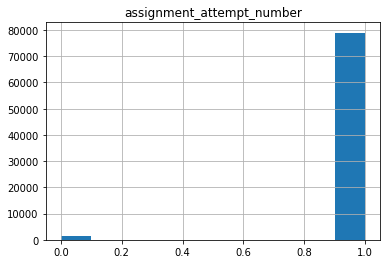

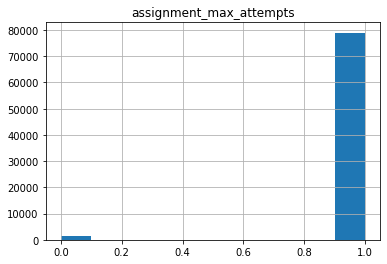

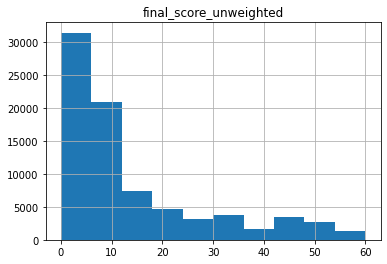

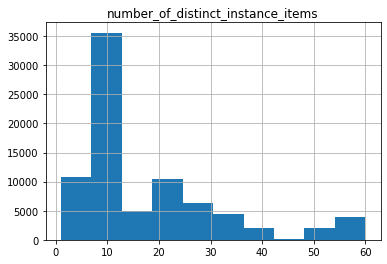

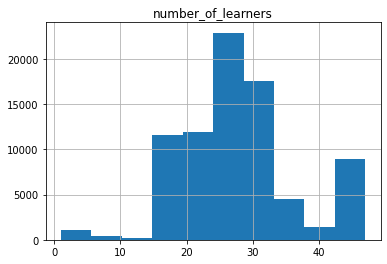

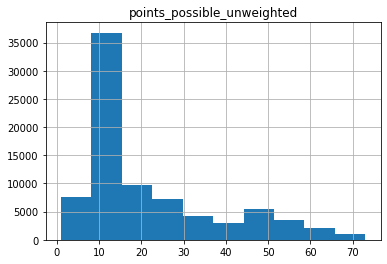

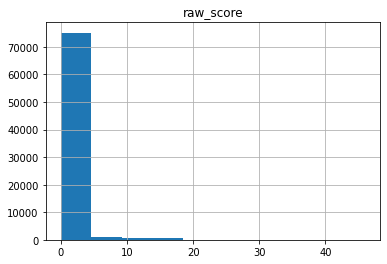

In [14]:
for f in types['continuousVars']:
  filterDf.select(f).toPandas().hist()

Normal Distribution
- number_of_learners
- possible outliers greaterthan 40
- investigate further

Right Skewed
- final_score_unweighted
- number_of_distinct_instance_items
- points_possible_unweighted
- raw_score

Binary Values (0/1)
- assignment_max_attempts
- assignment_attempt_number
- Appears binary but the variable name indicates it could have any values. The data only contains 1 and 0
- Investigate further

In [15]:
add_todo("Investigate number_of_learners > 40 outliers")
add_todo("Investigate binary variables assignment_attempt_number and assignment_max_attempts")

#### Correlation Heatmap

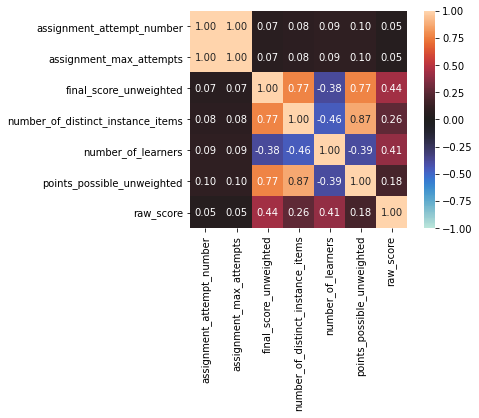

In [16]:
corr, ax = associations( filterDf.select(*types['continuousVars']).toPandas(), nan_replace_value='null' )

- assignment_attempt_number and assignment_max_attempts highly correlated

###### Crosstab: assignment_attempt_number and assignment_max_attempts

In [17]:
dfPd = filterDf.select('assignment_attempt_number', 'assignment_max_attempts').toPandas()
pd.crosstab(dfPd.assignment_attempt_number.fillna('null'), dfPd.assignment_max_attempts.fillna('null'), margins=True, margins_name="Total")

assignment_max_attempts,0,1,Total
assignment_attempt_number,,,
0,1566,0,1566
1,0,78982,78982
Total,1566,78982,80548


- assignment_max_attempts 1 is always assignment_attempt_number = 1

###### Null and Zero Variables

In [21]:
null_zero_counts(filterDf, types['continuousVars'])

,null,zero
assignment_attempt_number,0,1566
assignment_max_attempts,0,1566
final_score_unweighted,0,16582
number_of_distinct_instance_items,0,0
number_of_learners,0,0
points_possible_unweighted,0,0
raw_score,3298,31084


- possibile correlation between assignment_attempt_number and assignment_max_attempts
  - both have 1566 zero values
  - Needs further investigation
- final_score_unweighted has 16,582 zero values
  - possibly because not yet scored
  - needs further investigation
- raw_score
  - 3298 null values
    - investigate for correlation with null values in response_correctness
  - 31084 zero values
    - investigate further

In [19]:
add_todo('Investigate assignment_attempt_number and assignment_max_attempts both have 1566 values')
add_todo('Investigate final_score_unweighted has 16,582 zero values')
add_todo('Investigate 3298 null values in raw_score')
add_todo('Investigate 31084 zero values in raw_score')
